In [1]:
import pandas as pd

data=pd.read_csv("df_replaced.csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,datetime,Load
0,2019-03-21 00:00:00,352.862799
1,2019-03-21 01:00:00,330.444853
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [3]:
df=data

In [4]:
df.dtypes

datetime    datetime64[ns]
Load               float64
dtype: object

In [5]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [6]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
X = df.drop(labels=[], axis=1)
y = df['Load']

In [7]:
y

datetime
2019-03-21 00:00:00    352.862799
2019-03-21 01:00:00    330.444853
2019-03-21 02:00:00    287.419792
2019-03-21 03:00:00    258.110368
2019-03-21 04:00:00    247.745866
                          ...    
2021-09-22 19:00:00    632.235500
2021-09-22 20:00:00    612.703162
2021-09-22 21:00:00    589.574385
2021-09-22 22:00:00    561.323968
2021-09-22 23:00:00    522.105758
Name: Load, Length: 22008, dtype: float64

In [8]:
X

,Load
datetime,
2019-03-21 00:00:00,352.862799
2019-03-21 01:00:00,330.444853
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [9]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00', '2019-03-21 01:00:00',
               '2019-03-21 02:00:00', '2019-03-21 03:00:00',
               '2019-03-21 04:00:00', '2019-03-21 05:00:00',
               '2019-03-21 06:00:00', '2019-03-21 07:00:00',
               '2019-03-21 08:00:00', '2019-03-21 09:00:00',
               ...
               '2021-03-23 05:00:00', '2021-03-23 06:00:00',
               '2021-03-23 07:00:00', '2021-03-23 08:00:00',
               '2021-03-23 09:00:00', '2021-03-23 10:00:00',
               '2021-03-23 11:00:00', '2021-03-23 12:00:00',
               '2021-03-23 13:00:00', '2021-03-23 14:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17607, freq=None)

In [11]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00', '2021-03-23 16:00:00',
               '2021-03-23 17:00:00', '2021-03-23 18:00:00',
               '2021-03-23 19:00:00', '2021-03-23 20:00:00',
               '2021-03-23 21:00:00', '2021-03-23 22:00:00',
               '2021-03-23 23:00:00', '2021-03-24 00:00:00',
               ...
               '2021-09-22 14:00:00', '2021-09-22 15:00:00',
               '2021-09-22 16:00:00', '2021-09-22 17:00:00',
               '2021-09-22 18:00:00', '2021-09-22 19:00:00',
               '2021-09-22 20:00:00', '2021-09-22 21:00:00',
               '2021-09-22 22:00:00', '2021-09-22 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=4401, freq=None)

<Axes: xlabel='datetime'>

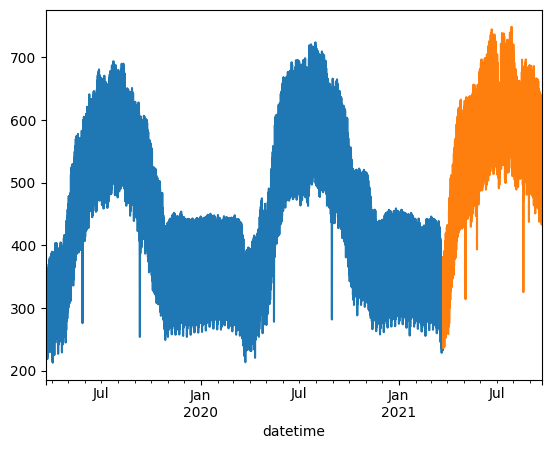

In [12]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('datetime').mean().plot()

In [13]:
print(X_train.shape, X_test.shape)

(17607, 1) (4401, 1)


In [14]:
y_train.shape

(17607,)

In [15]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

<ipython-input-15-4d9097f2dad2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-15-4d9097f2dad2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data


In [16]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 1) (17583, 1) (4377, 24, 1) (4377, 1)


In [18]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00


In [19]:
import optuna

In [20]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [21]:

def build_model(num_layers, units, dropout_rates, learning_rate):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

In [ ]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to be optimized
    num_layers = trial.suggest_int("num_layers", 1, 2)
    units = [trial.suggest_int(f"units_{i}", 150, 250) for i in range(num_layers)]
    dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Build the model based on the suggested hyperparameters
    model = build_model(num_layers, units, dropout_rates, learning_rate)



    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
       patience=2,
        restore_best_weights=True
    )



    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size = batch_size,
        validation_split=0.2,
        callbacks=[early_stopping]
        )

    # Return the validation loss as the objective value to minimize
    return np.min(history.history["val_loss"])


pruner = optuna.pruners.PercentilePruner(percentile=70)  # Adjust the percentile value as needed
#pruner = optuna.pruners.MedianPruner()
# Optimize the hyperparameters using Bayesian optimization
study = optuna.create_study( sampler=optuna.samplers.TPESampler(), direction="minimize" , pruner=pruner)
study.optimize(objective, n_trials=20)

# Get the best hyperparameters and the corresponding objective value
best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Objective Value:", best_value)

# Build the final model with the best hyperparameters
#best_model = build_model(best_params["num_layers"],
  #                       [best_params[f"units_{i}"] for i in range(best_params["num_layers"])],
          #               [best_params[f"dropout_{i}"] for i in range(best_params["num_layers"])])

[I 2024-04-04 14:28:06,828] A new study created in memory with name: no-name-ec0d03c7-f5f7-4e18-bf4b-0806c8dc5a8c
<ipython-input-22-57e2ce41b221>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
<ipython-input-22-57e2ce41b221>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


Epoch 1/50
220/220 [==============================] - 67s 272ms/step - loss: 0.0486 - val_loss: 0.0064
Epoch 2/50
220/220 [==============================] - 59s 267ms/step - loss: 0.0080 - val_loss: 0.0022
Epoch 3/50
220/220 [==============================] - 61s 277ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 4/50
220/220 [==============================] - 59s 268ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 5/50
220/220 [==============================] - 58s 266ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 6/50
220/220 [==============================] - 58s 265ms/step - loss: 0.0026 - val_loss: 0.0016


[I 2024-04-04 14:34:12,787] Trial 0 finished with value: 0.0012326569994911551 and parameters: {'num_layers': 3, 'units_0': 97, 'units_1': 209, 'units_2': 196, 'dropout_0': 0.3831416514692201, 'dropout_1': 0.4063574557107873, 'dropout_2': 0.49569315490721866, 'learning_rate': 0.008206903008998827, 'batch_size': 64}. Best is trial 0 with value: 0.0012326569994911551.


Epoch 1/50
220/220 [==============================] - 78s 316ms/step - loss: 0.0168 - val_loss: 0.0047
Epoch 2/50
220/220 [==============================] - 73s 333ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 3/50
220/220 [==============================] - 71s 322ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 4/50
220/220 [==============================] - 72s 325ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 5/50
220/220 [==============================] - 67s 305ms/step - loss: 0.0029 - val_loss: 9.5527e-04
Epoch 6/50
220/220 [==============================] - 67s 304ms/step - loss: 0.0021 - val_loss: 7.1694e-04
Epoch 7/50
220/220 [==============================] - 72s 325ms/step - loss: 0.0019 - val_loss: 7.8539e-04
Epoch 8/50
220/220 [==============================] - 66s 302ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/50
220/220 [==============================] - 73s 332ms/step - loss: 0.0015 - val_loss: 7.4122e-04


[I 2024-04-04 14:45:18,225] Trial 1 finished with value: 0.0007169367163442075 and parameters: {'num_layers': 4, 'units_0': 179, 'units_1': 201, 'units_2': 82, 'units_3': 128, 'dropout_0': 0.14302786963465058, 'dropout_1': 0.4649415119222818, 'dropout_2': 0.2569998220501361, 'dropout_3': 0.05066640939998629, 'learning_rate': 0.001473334645631859, 'batch_size': 64}. Best is trial 1 with value: 0.0007169367163442075.


Epoch 1/50
440/440 [==============================] - 29s 61ms/step - loss: 0.0219 - val_loss: 0.0020
Epoch 2/50
440/440 [==============================] - 26s 60ms/step - loss: 0.0032 - val_loss: 9.3828e-04
Epoch 3/50
440/440 [==============================] - 25s 56ms/step - loss: 0.0019 - val_loss: 6.3991e-04
Epoch 4/50
440/440 [==============================] - 27s 61ms/step - loss: 0.0016 - val_loss: 6.0861e-04
Epoch 5/50
440/440 [==============================] - 26s 60ms/step - loss: 0.0013 - val_loss: 6.0303e-04
Epoch 6/50
440/440 [==============================] - 26s 59ms/step - loss: 0.0013 - val_loss: 4.5972e-04
Epoch 7/50
440/440 [==============================] - 26s 59ms/step - loss: 0.0011 - val_loss: 5.6208e-04
Epoch 8/50
440/440 [==============================] - 24s 55ms/step - loss: 0.0011 - val_loss: 6.3835e-04
Epoch 9/50
440/440 [==============================] - 25s 57ms/step - loss: 0.0010 - val_loss: 4.5060e-04
Epoch 10/50
440/440 [=============================

[I 2024-04-04 14:53:02,644] Trial 2 finished with value: 0.00032765869400464 and parameters: {'num_layers': 1, 'units_0': 186, 'dropout_0': 0.3265446238324807, 'learning_rate': 0.012101255802657094, 'batch_size': 32}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
110/110 [==============================] - 54s 415ms/step - loss: 0.0432 - val_loss: 0.0132
Epoch 2/50
110/110 [==============================] - 45s 411ms/step - loss: 0.0192 - val_loss: 0.0113
Epoch 3/50
110/110 [==============================] - 43s 388ms/step - loss: 0.0163 - val_loss: 0.0090
Epoch 4/50
110/110 [==============================] - 44s 400ms/step - loss: 0.0129 - val_loss: 0.0061
Epoch 5/50
110/110 [==============================] - 44s 399ms/step - loss: 0.0109 - val_loss: 0.0055
Epoch 6/50
110/110 [==============================] - 44s 399ms/step - loss: 0.0100 - val_loss: 0.0038
Epoch 7/50
110/110 [==============================] - 42s 384ms/step - loss: 0.0091 - val_loss: 0.0045
Epoch 8/50
110/110 [==============================] - 43s 390ms/step - loss: 0.0085 - val_loss: 0.0029
Epoch 9/50
110/110 [==============================] - 44s 403ms/step - loss: 0.0081 - val_loss: 0.0028
Epoch 10/50
110/110 [==============================] - 44s 402ms/step - l

[I 2024-04-04 15:07:02,969] Trial 3 finished with value: 0.0020635786931961775 and parameters: {'num_layers': 4, 'units_0': 220, 'units_1': 83, 'units_2': 89, 'units_3': 123, 'dropout_0': 0.23527026517524108, 'dropout_1': 0.4674819315527402, 'dropout_2': 0.06698654164424889, 'dropout_3': 0.49179927045218963, 'learning_rate': 0.00016775176922939554, 'batch_size': 128}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
110/110 [==============================] - 16s 130ms/step - loss: 1.7386 - val_loss: 0.0013
Epoch 2/50
110/110 [==============================] - 14s 130ms/step - loss: 0.0124 - val_loss: 0.0014
Epoch 3/50
110/110 [==============================] - 14s 128ms/step - loss: 0.0071 - val_loss: 9.4771e-04
Epoch 4/50
110/110 [==============================] - 15s 133ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 5/50
110/110 [==============================] - 14s 131ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 6/50
110/110 [==============================] - 14s 127ms/step - loss: 0.0040 - val_loss: 7.9175e-04
Epoch 7/50
110/110 [==============================] - 14s 131ms/step - loss: 0.0037 - val_loss: 7.8076e-04
Epoch 8/50
110/110 [==============================] - 14s 127ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 9/50
110/110 [==============================] - 14s 129ms/step - loss: 0.0028 - val_loss: 7.8997e-04
Epoch 10/50
110/110 [==============================] - 14

[I 2024-04-04 15:11:52,102] Trial 4 finished with value: 0.0003737258957698941 and parameters: {'num_layers': 1, 'units_0': 201, 'dropout_0': 0.35397522987084373, 'learning_rate': 0.05583588559581306, 'batch_size': 128}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
440/440 [==============================] - 154s 330ms/step - loss: 0.0194 - val_loss: 0.0071
Epoch 2/50
440/440 [==============================] - 139s 316ms/step - loss: 0.0086 - val_loss: 0.0034
Epoch 3/50
440/440 [==============================] - 141s 320ms/step - loss: 0.0066 - val_loss: 0.0023
Epoch 4/50
440/440 [==============================] - 140s 319ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 5/50
440/440 [==============================] - 140s 318ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 6/50
440/440 [==============================] - 142s 321ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 7/50
440/440 [==============================] - 142s 322ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 8/50
440/440 [==============================] - 152s 345ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 9/50
440/440 [==============================] - 150s 342ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 10/50
440/440 [==============================] - 140s 319m

[I 2024-04-04 15:41:00,220] Trial 5 finished with value: 0.0018011076608672738 and parameters: {'num_layers': 4, 'units_0': 242, 'units_1': 124, 'units_2': 247, 'units_3': 237, 'dropout_0': 0.3658880835986181, 'dropout_1': 0.38537173063452496, 'dropout_2': 0.09444875938901937, 'dropout_3': 0.3892603769316305, 'learning_rate': 0.00013883807914261189, 'batch_size': 32}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
220/220 [==============================] - 66s 272ms/step - loss: 0.0766 - val_loss: 0.0144
Epoch 2/50
220/220 [==============================] - 60s 271ms/step - loss: 0.0183 - val_loss: 0.0141
Epoch 3/50
220/220 [==============================] - 58s 264ms/step - loss: 0.0179 - val_loss: 0.0135
Epoch 4/50
220/220 [==============================] - 59s 267ms/step - loss: 0.0175 - val_loss: 0.0130
Epoch 5/50
220/220 [==============================] - 66s 301ms/step - loss: 0.0168 - val_loss: 0.0128
Epoch 6/50
220/220 [==============================] - 59s 268ms/step - loss: 0.0162 - val_loss: 0.0119
Epoch 7/50
220/220 [==============================] - 58s 264ms/step - loss: 0.0154 - val_loss: 0.0110
Epoch 8/50
220/220 [==============================] - 60s 274ms/step - loss: 0.0144 - val_loss: 0.0100
Epoch 9/50
220/220 [==============================] - 64s 292ms/step - loss: 0.0129 - val_loss: 0.0090
Epoch 10/50
220/220 [==============================] - 61s 279ms/step - l

[I 2024-04-04 16:29:42,908] Trial 6 finished with value: 0.0021899279672652483 and parameters: {'num_layers': 3, 'units_0': 170, 'units_1': 113, 'units_2': 239, 'dropout_0': 0.4650066932008885, 'dropout_1': 0.262004932883332, 'dropout_2': 0.23393442960905514, 'learning_rate': 1.3918460061940963e-05, 'batch_size': 64}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
220/220 [==============================] - 97s 398ms/step - loss: 0.0327 - val_loss: 0.0128
Epoch 2/50
220/220 [==============================] - 82s 375ms/step - loss: 0.0155 - val_loss: 0.0101
Epoch 3/50
220/220 [==============================] - 88s 402ms/step - loss: 0.0110 - val_loss: 0.0062
Epoch 4/50
220/220 [==============================] - 89s 407ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 5/50
220/220 [==============================] - 91s 411ms/step - loss: 0.0076 - val_loss: 0.0039
Epoch 6/50
220/220 [==============================] - 86s 393ms/step - loss: 0.0071 - val_loss: 0.0033
Epoch 7/50
220/220 [==============================] - 82s 374ms/step - loss: 0.0065 - val_loss: 0.0029
Epoch 8/50
220/220 [==============================] - 86s 393ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 9/50
220/220 [==============================] - 88s 398ms/step - loss: 0.0060 - val_loss: 0.0025
Epoch 10/50
220/220 [==============================] - 87s 395ms/step - l

[I 2024-04-04 17:10:20,259] Trial 7 finished with value: 0.00178173475433141 and parameters: {'num_layers': 4, 'units_0': 131, 'units_1': 206, 'units_2': 236, 'units_3': 101, 'dropout_0': 0.11174390776878529, 'dropout_1': 0.2507637133839949, 'dropout_2': 0.07937883940103413, 'dropout_3': 0.19852533369848896, 'learning_rate': 6.145282644476075e-05, 'batch_size': 64}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
880/880 [==============================] - 92s 99ms/step - loss: 0.0103 - val_loss: 0.0026
Epoch 2/50
880/880 [==============================] - 87s 99ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 3/50
880/880 [==============================] - 86s 97ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/50
880/880 [==============================] - 98s 111ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 5/50
880/880 [==============================] - 91s 104ms/step - loss: 0.0019 - val_loss: 9.2332e-04
Epoch 6/50
880/880 [==============================] - 96s 109ms/step - loss: 0.0017 - val_loss: 7.6714e-04
Epoch 7/50
880/880 [==============================] - 106s 120ms/step - loss: 0.0015 - val_loss: 8.3585e-04
Epoch 8/50
880/880 [==============================] - 105s 119ms/step - loss: 0.0014 - val_loss: 5.5408e-04
Epoch 9/50
880/880 [==============================] - 105s 119ms/step - loss: 0.0012 - val_loss: 5.2571e-04
Epoch 10/50
880/880 [==============================] 

[I 2024-04-04 17:36:34,423] Trial 8 finished with value: 0.0003659132053144276 and parameters: {'num_layers': 2, 'units_0': 183, 'units_1': 202, 'dropout_0': 0.2859505541646955, 'dropout_1': 0.09162325074473754, 'learning_rate': 0.00021359370888781147, 'batch_size': 16}. Best is trial 2 with value: 0.00032765869400464.


Epoch 1/50
440/440 [==============================] - 153s 327ms/step - loss: 0.0511 - val_loss: 0.0130
Epoch 2/50
440/440 [==============================] - 147s 334ms/step - loss: 0.0166 - val_loss: 0.0127
Epoch 3/50
440/440 [==============================] - 156s 354ms/step - loss: 0.0155 - val_loss: 0.0112
Epoch 4/50
440/440 [==============================] - 153s 347ms/step - loss: 0.0142 - val_loss: 0.0098
Epoch 5/50
440/440 [==============================] - 111s 253ms/step - loss: 0.0121 - val_loss: 0.0079
Epoch 6/50
440/440 [==============================] - 110s 250ms/step - loss: 0.0103 - val_loss: 0.0067
Epoch 7/50
440/440 [==============================] - 111s 252ms/step - loss: 0.0091 - val_loss: 0.0059
Epoch 8/50
440/440 [==============================] - 110s 251ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 9/50
440/440 [==============================] - 111s 253ms/step - loss: 0.0076 - val_loss: 0.0046
Epoch 10/50
440/440 [==============================] - 115s 262m

[I 2024-04-04 18:24:44,177] Trial 9 finished with value: 0.002473421161994338 and parameters: {'num_layers': 4, 'units_0': 207, 'units_1': 204, 'units_2': 145, 'units_3': 151, 'dropout_0': 0.08120091080486508, 'dropout_1': 0.0762974838377592, 'dropout_2': 0.3830083071018065, 'dropout_3': 0.10179973526244757, 'learning_rate': 1.0709958100680404e-05, 'batch_size': 32}. Best is trial 2 with value: 0.00032765869400464.


Best Hyperparameters: {'num_layers': 1, 'units_0': 186, 'dropout_0': 0.3265446238324807, 'learning_rate': 0.012101255802657094, 'batch_size': 32}
Best Objective Value: 0.00032765869400464


In [ ]:
# Print the best hyperparameters and the corresponding objective value
print("Best Hyperparameters:", study.best_params)
print("Best Objective Value:", study.best_value)

Best Hyperparameters: {'num_layers': 1, 'units_0': 186, 'dropout_0': 0.3265446238324807, 'learning_rate': 0.012101255802657094, 'batch_size': 32}
Best Objective Value: 0.00032765869400464


# [**Plots**](https://medium.com/optuna/visualizing-hyperparameters-in-optuna-86c224bd255f)

In [ ]:
# Generate Optuna optimization history plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()


In [ ]:
# Generate Optuna slice plot
fig = optuna.visualization.plot_slice(study)
fig.show()

In [ ]:
# Generate Optuna parallel coordinate plot
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [ ]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [ ]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_contour(study, ['num_layers', 'units_0'])

fig.show()